## 感知机(Perceptron)

> 神经网络是多层感知机

#### 思想: 错误驱动

- 从初始状态 $w_0$开始, 根据每一个在集合 $D$中的元素,对w进行调整和优化, 使得 $|D|$越来越小, 最终达到 $w^Tx$的状态, 从不同方向优化, 可能获得不同的结果

> 前提是数据是线性可分的

#### 模型

- 模型 $$ f(x) = sing(w^Tx)  x \in R^p, w \in R^p$$

$$ sing(a) = \begin{cases} +1, a >= 0 \\ -1, a < 0 \end{cases}$$

- L是被错误分类的样本个数: $$ L(W) = \sum^{N}_{i=1} I\{y_iw^Tx_i < 0\} $$

- 当w发生微小的变化时, 如 $w + \nabla w$, 则I可能从0变成1, 或从1变为0, 说明函数不可导, 因此无法求梯度

- 观察 $y_iw^Tx_i$ , $y_i$是其标签, 为定值1或-1, 因此当w发生微小变化时, $y_iw^Tx_i$跟随, 每次对w进行优化, $y_iw^Tx_i$将从负数逐渐变为0

- 因此, 使用$y_iw^Tx_i$可导, 使用 $$ L(w) = \sum_{x_i,y_i \in D} -y_iw^Tx_i, 求导可得 \nabla_wL = -y_ix_i$$

- 使用随机梯度下降, 可得 $$ w^{i + 1} = w^i - \lambda\nabla_wL = w^i + \lambda y_ix_i$$

[  -615.04492366 -16942.24412766   7912.04862092]
1 [  1  68 140]
1 [  1  67 142]
1 [  1  79 167]
1 [  1  71 150]
1 [  1  72 145]
1 [  1  71 140]
1 [  1  71 152]
1 [  1  70 143]
-1 [  1  63 145]


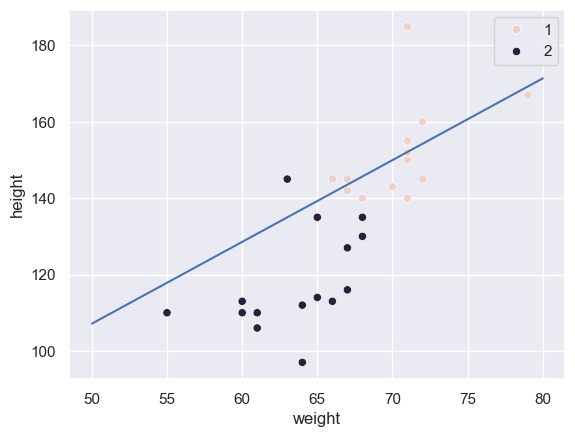

In [164]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dataUrl = '.\\lineSplit.csv'
df = pd.read_csv(dataUrl)

sns.set()
sns.scatterplot(x="weight", y="height", hue="gender",data=df)


# 将y值规整化
y = np.array(df)[:,0]
# b值替换y值的列, 就不用再创建新列再加入了, W = b + w1 + w2
df = df.replace({-1:1})
X = np.array(df)
# 使用均值作为初始值
w = [ 1,1,1]
x_ = [0,0,0]
for _ in range(1003):
    error_count = 0
    for i in range(len(X)):
        xi= X[i]
        yi= y[i]
        if yi * np.dot(xi, w) <=0:
            x_ += xi * yi
            error_count += 1
    w += x_/error_count /100
    
x_points = np.linspace(50,80, 10)
# w0 + w1*x1 + w2*x2 = 0 => x2 = (w0+w1*x2)/(-w2)
y_ = (w[0] + w[1] * x_points)/-w[2]
sns.lineplot(x=x_points, y = y_)
plt.show()


#### 为什么不能回归到反方向去? 是什么的限制?